In [1]:
# We will use the following packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, accuracy_score, mean_absolute_error, f1_score, matthews_corrcoef



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd "Documents/GitHub/pmx_gasoline_theft_prediction/"

/Users/jorgeroa/Documents/GitHub/pmx_gasoline_theft_prediction


In [4]:
# Importing our data

df_thefts_PMX = pd.read_excel("data/df_thefts_PMX_cleaned_spat.xlsx", converters={'CVEGEO' : str})



In [5]:
social_variables = df_thefts_PMX.columns.drop(['Mun_code', 'Susceptible'])
social_variables

Index(['Pipe_intersec', 'Gas_stations', 'Gas_price', 'Population',
       'Confront_events', 'IRS', 'Homic_rate', 'SBASC', 'POB_6_16_NEB',
       'POB_16_EBI', 'NO_SS', 'OVPT', 'NO_SANIT', 'OVSAE', 'NO_DREN',
       'NO_ELECT', 'NO_LAVA', 'No_REFRI', 'porc_highway', 'CARR-KM', 'LINCARR',
       'RED-KM', 'LINRED', 'DENSCARR', 'DENSRED', 'CVEGEO', 'vehicles_15_19',
       'vehicles_rate_15_19'],
      dtype='object')

In [6]:
#Fill 0s in Gas_prices NaN values

for key in social_variables:
  df_thefts_PMX[key] = df_thefts_PMX[key].fillna(0)

df_thefts_PMX.head()

,Mun_code,Pipe_intersec,Gas_stations,Gas_price,Population,Confront_events,IRS,Homic_rate,Susceptible,SBASC,...,porc_highway,CARR-KM,LINCARR,RED-KM,LINRED,DENSCARR,DENSRED,CVEGEO,vehicles_15_19,vehicles_rate_15_19
0,1001,22,12.26,17.78,905682,0,-1.3456,5.41,1,1.887423,...,0.1,438.190142,1053,765.173487,5500,0.371946,0.649498,1001,1840102.6,203173.14
1,1002,3,10.32,17.93,48472,0,-0.8732,4.13,0,4.053829,...,0.3,173.662987,284,158.986649,615,0.316320,0.289588,1002,57072.2,117742.61
2,1004,5,12.39,17.85,16141,0,-1.0391,6.20,0,3.835153,...,0.0,69.959236,108,28.910152,255,0.539226,0.222831,1004,19784.0,122569.85
3,1005,5,23.35,17.84,124185,0,-1.1825,4.83,0,2.887218,...,0.0,151.549502,438,177.436744,1292,0.300104,0.351367,1005,201306.2,162101.86
4,1006,8,14.91,17.83,46941,0,-1.1859,4.26,1,3.120712,...,0.2,85.510623,239,92.675448,682,0.432396,0.468626,1006,64330.2,137044.80


In [7]:
# We will now set data and target 
X = df_thefts_PMX.drop(columns=["Susceptible", 'Mun_code', 'Confront_events', 'CVEGEO', 
                                'Population', 'IRS', 'POB_6_16_NEB', 
                                'POB_16_EBI', 'OVPT', 'OVSAE', 'NO_DREN', 'NO_ELECT', 
                                'LINRED', 'vehicles_15_19'])
y = df_thefts_PMX["Susceptible"]
X.columns

Index(['Pipe_intersec', 'Gas_stations', 'Gas_price', 'Homic_rate', 'SBASC',
       'NO_SS', 'NO_SANIT', 'NO_LAVA', 'No_REFRI', 'porc_highway', 'CARR-KM',
       'LINCARR', 'RED-KM', 'DENSCARR', 'DENSRED', 'vehicles_rate_15_19'],
      dtype='object')

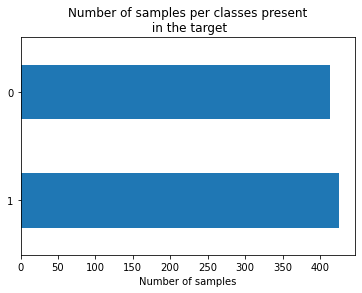

In [8]:
# Checking class balancing

import matplotlib.pyplot as plt

y.value_counts().plot.barh()
plt.xlabel("Number of samples")
_ = plt.title("Number of samples per classes present\n in the target")

In [9]:
# Set up training and testing data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=True, random_state=123, stratify=y, test_size=0.2)

In [10]:
# 1. Logistic Regression Model
# 1.1 Preprocessing the data - Logistic Regression Model

pipe = Pipeline([('scaler', StandardScaler()), 
                 ('model', LogisticRegression())
                 ])

#pipe.fit(X_train, y_train)
classifier = pipe.fit(X_train, y_train)





In [11]:
# 1.2 Here we predict using our unseen data (X_test)

target_predicted = pipe.predict(X_test)


In [12]:
# 1.3 Checking the accuracy

accuracy = accuracy_score(y_test, target_predicted)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6488


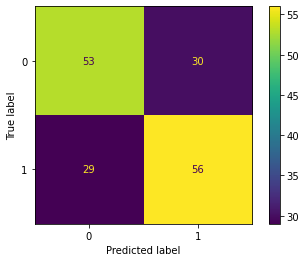

In [13]:
# 1.4 Checking the Confusion Matrix

_ = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test) 

In [16]:
# 1.5 Some other metrics scores

precision = precision_score(y_test, target_predicted)
recall = recall_score(y_test, target_predicted)
# f1 score: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, target_predicted)
mcc = matthews_corrcoef(y_test, target_predicted)



print(f"Precision score: {precision:.4f}")
print(f"Recall score: {recall:.4f}")
print(f"F1 score: {f1:.4f}")
print(f"MCC score: {mcc:.4f}")

Precision score: 0.6512
Recall score: 0.6588
F1 score: 0.6550
MCC score: 0.2974


In [17]:
# Using cross_val_score function to evaluate the model.

from sklearn.model_selection import cross_val_score


scores_train = cross_val_score(pipe, X_train, y_train)
#scores_train.mean()
scores_test = cross_val_score(pipe, X_test, y_test)
#scores_test.mean()
print(f"Cross Val Score - Train data: {scores_train.mean():.4f}")
print(f"Cross Val Score - Test data: {scores_test.mean():.4f}")

Cross Val Score - Train data: 0.6528
Cross Val Score - Test data: 0.6604


(0.0, 1.0)

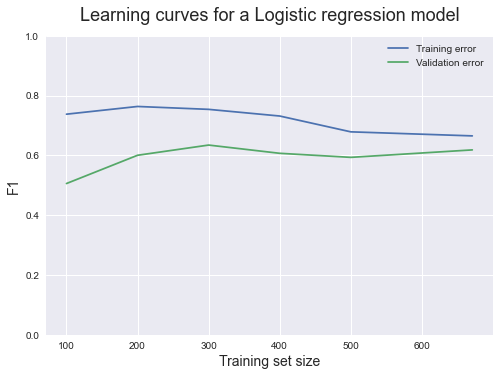

In [18]:
# Learning curve
#Source: https://www.dataquest.io/blog/learning-curves-machine-learning/

train_sizes = [1, 100, 200, 300, 400, 500, 671]

from sklearn.model_selection import learning_curve
features = ['Pipe_intersec', 'Gas_stations', 'Gas_price', 'Homic_rate', 'SBASC',
       'NO_SS', 'NO_SANIT', 'NO_LAVA', 'No_REFRI', 'porc_highway', 'CARR-KM',
       'LINCARR', 'RED-KM', 'DENSCARR', 'DENSRED', 'vehicles_rate_15_19']
target = "Susceptible"
train_sizes, train_scores, validation_scores = learning_curve(
    estimator = pipe, 
    X = X[features],
    y = y, train_sizes = train_sizes, cv = 5,
    scoring = 'f1')


import matplotlib.pyplot as plt

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('F1', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Logistic regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,1)

In [19]:
# 2. Decision Tree model
# 2.1 Preprocessing the data - Decision Tree Model

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)




DecisionTreeClassifier()

In [20]:
# 2.2 Here we predict using our unseen data (X_test)


target_predicted = classifier.predict(X_test)


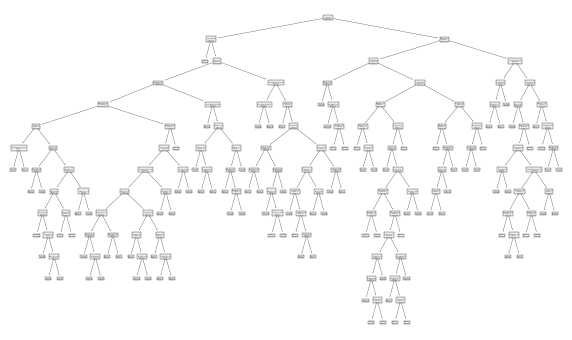

In [21]:
#Plotting the decision tree

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(10, 6))
_ = plot_tree(classifier, feature_names=X.columns, impurity=False, ax=ax)


In [22]:
# 2.3 Checking the accuracy
import matplotlib.pyplot as plt

#plt.scatter(y_test, target_predicted)
#plt.show()



accuracy = accuracy_score(y_test, target_predicted)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6786


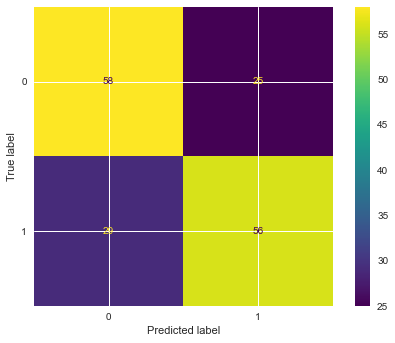

In [23]:
# 2.4 Checking the Confusion Matrix

_ = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test) 

In [24]:
# 2.5 Some other metrics scores

precision = precision_score(y_test, target_predicted)
recall = recall_score(y_test, target_predicted)
# f1 score: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, target_predicted)
mcc = matthews_corrcoef(y_test, target_predicted)



print(f"Precision score: {precision:.4f}")
print(f"Recall score: {recall:.4f}")
print(f"F1 score: {f1:.4f}")
print(f"MCC score: {mcc:.4f}")

Precision score: 0.6914
Recall score: 0.6588
F1 score: 0.6747
MCC score: 0.3578


In [25]:
# Using cross_val_score function to evaluate the model.

from sklearn.model_selection import cross_val_score

scores_train = cross_val_score(classifier, X_train, y_train)
scores_train.mean()
scores_test = cross_val_score(classifier, X_test, y_test)
scores_test.mean()
print(f"Cross Val Score - Train data: {scores_train.mean():.4f}")
print(f"Cross Val Score - Test data: {scores_test.mean():.4f}")

Cross Val Score - Train data: 0.6945
Cross Val Score - Test data: 0.6966


In [26]:
# 2.6 Some other metrics

from sklearn.metrics import classification_report
print(classification_report(y_test, target_predicted))

              precision    recall  f1-score   support

           0       0.67      0.70      0.68        83
           1       0.69      0.66      0.67        85

    accuracy                           0.68       168
   macro avg       0.68      0.68      0.68       168
weighted avg       0.68      0.68      0.68       168



/Users/jorgeroa/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


(0.0, 1.5)

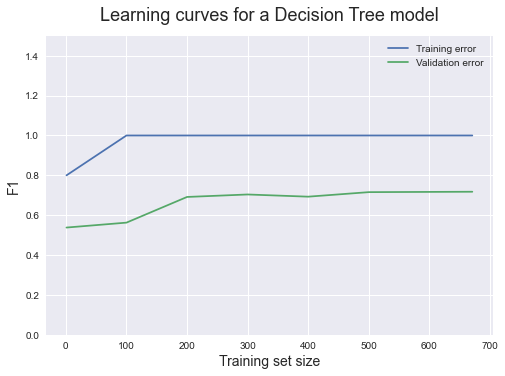

In [27]:
# Learning curve
#Source: https://www.dataquest.io/blog/learning-curves-machine-learning/

train_sizes = [1, 100, 200, 300, 400, 500, 671]

from sklearn.model_selection import learning_curve
features = X_train.columns
target = "Susceptible"
train_sizes, train_scores, validation_scores = learning_curve(
    estimator = classifier, 
    X = X[features],
    y = y, train_sizes = train_sizes, cv = 5,
    scoring = 'f1')


import matplotlib.pyplot as plt

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('F1', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Decision Tree model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,1.5)

In [28]:
# 3. Random Forest model
# 3.1 Preprocessing the data

data = X_train
target = y_train

from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier


categorical_encoder = OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=-1
)
preprocessor = make_column_transformer(
    (categorical_encoder, make_column_selector(dtype_include=object)),
    remainder="passthrough"
)

random_forest = make_pipeline(
    preprocessor,
    RandomForestClassifier(n_estimators=500, n_jobs=4, random_state=123)
)




In [29]:
# 3.2 Checking the accuracy with the trainning data

scores_random_forest = cross_val_score(random_forest, data, target)

print(f"Random forest classifier: "
      f"{scores_random_forest.mean():.3f} ± "
      f"{scores_random_forest.std():.3f}")


Random forest classifier: 0.802 ± 0.034


In [30]:
#3.3 Prepare to fit and predict with testing data


clf = RandomForestClassifier(n_estimators = 500, bootstrap = True, random_state = 123).fit(X_train, y_train)



In [31]:
# Create our predictions
prediction = clf.predict(X_test)



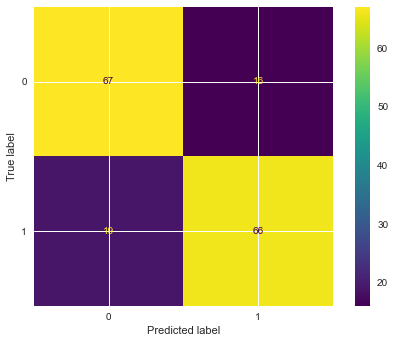

In [32]:


_ = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test) 

In [33]:
# Display accuracy score
accuracy_score(y_test, prediction)


0.7916666666666666

In [34]:
# 3.5 Some other metrics scores

precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)
mcc = matthews_corrcoef(y_test, prediction)


print(f"Precision score: {precision:.4f}")
print(f"Recall score: {recall:.4f}")
print(f"F1 score: {f1:.4f}")
print(f"MCC score: {mcc:.4f}")

Precision score: 0.8049
Recall score: 0.7765
F1 score: 0.7904
MCC score: 0.5838


In [35]:
# Using cross_val_score function to evaluate the model.

from sklearn.model_selection import cross_val_score

scores_train = cross_val_score(clf, X_train, y_train)
scores_train.mean()
scores_test = cross_val_score(clf, X_test, y_test)
scores_test.mean()
print(f"Cross Val Score - Train data: {scores_train.mean():.4f}")
print(f"Cross Val Score - Test data: {scores_test.mean():.4f}")

Cross Val Score - Train data: 0.8018
Cross Val Score - Test data: 0.7615


/Users/jorgeroa/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


(0.0, 1.5)

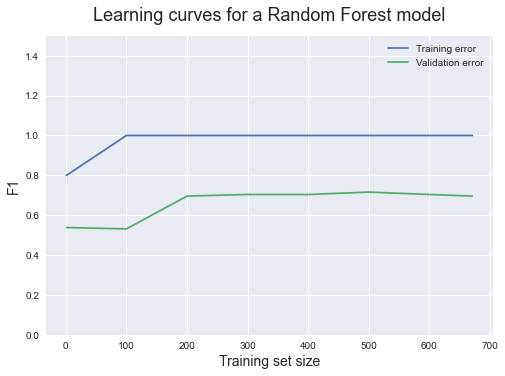

In [36]:
# Learning curve
#Source: https://www.dataquest.io/blog/learning-curves-machine-learning/

train_sizes = [1, 100, 200, 300, 400, 500, 671]

from sklearn.model_selection import learning_curve
from sklearn.metrics import f1_score, make_scorer

features = X_train.columns
target = "Susceptible"
train_sizes, train_scores, validation_scores = learning_curve(
    classifier, 
    X = X[features],
    y = y, train_sizes = train_sizes, cv = 5,
    scoring = 'f1')


import matplotlib.pyplot as plt

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('F1', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Random Forest model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,1.5)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


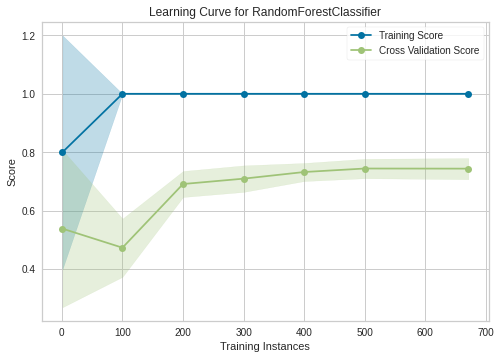

ValueError: ignored

In [243]:
# https://towardsdatascience.com/plotting-the-learning-curve-with-a-single-line-of-code-90a5bbb0f48a

from sklearn.ensemble import RandomForestClassifier

from yellowbrick.model_selection import learning_curve

train_sizes = [1, 100, 200, 300, 400, 500, 671]
features = X_train.columns



print(learning_curve(clf, X[features], y, train_sizes = train_sizes, scoring='f1'))

In [37]:
# Let´s check the importate of each variable
from sklearn.inspection import permutation_importance
#import shap
from matplotlib import pyplot as plt

clf.feature_importances_

array([0.23944816, 0.03562803, 0.04866878, 0.05284028, 0.0402208 ,
       0.06103639, 0.05078274, 0.04367353, 0.04562311, 0.0337835 ,
       0.04232224, 0.05486415, 0.04657972, 0.07064081, 0.07535645,
       0.0585313 ])

Text(0.5, 0, 'Random Forest Feature Importance')

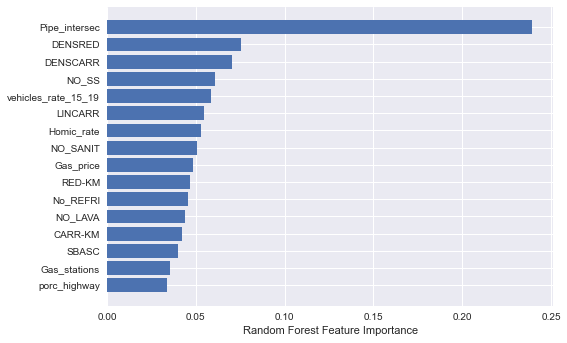

In [38]:
# Let´s check feature importance - Gini importance

sorted_idx = clf.feature_importances_.argsort()

plt.barh(X.columns[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 0, 'Permutation Importance')

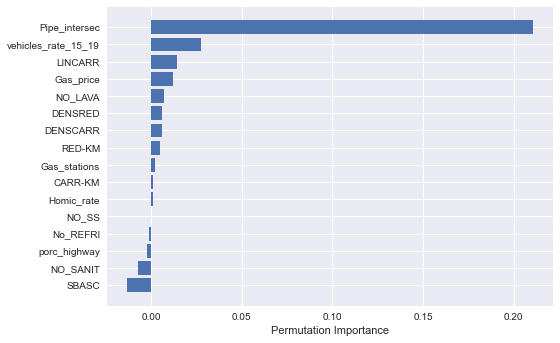

In [39]:
# Let´s check feature importance - Permutation Based Feature Importance 

perm_importance = permutation_importance(clf, X_test, y_test)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")


In [156]:
# How to evaluate the variables
# Source: https://medium.com/mlearning-ai/short-python-code-for-backward-elimination-with-detailed-explanation-52894a9a7880
#import statsmodels.api as sm 
#X_train_opt = np.append(arr = np.ones((671,1)).astype(int), values = X_train, axis = 1) 
#X_train_opt = X_train_opt[:,[0, 1, 2, 3, 7, 10, 12, 16, 17, 18, 19, 20, 21, 23]] 
#regressor_OLS = sm.OLS(endog = y_train, exog = X_train_opt).fit()
#regressor_OLS.summary()



In [40]:
# Using grid search to find optimal hyperparameters for Random Forest model
#Credits: https://github.com/pacejohn/Random_Forest_Grid_Search/blob/master/rf_gridsearch_census.ipynb


import numpy as np
import pandas as pd
from pprint import pprint
#from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

In [41]:
# Baseline: Random forest with default values.

# ************ Train/Test *********************
print("\n***************************************************************")
print("*****Random Forest With Default Hyperparameters Train/Test*****")
print("***************************************************************\n")

# ************ Train/Test *********************
# Create Random Forest Classifier using default hyperparameters
default_rf_clf = RandomForestClassifier(random_state=0)

# Train the Classifier
default_rf_clf.fit(X_train, y_train)

# Perform predictions
default_train_test_preds = default_rf_clf.predict(X_test)

# View the first 5 predictions and the predicted probabilities 
print("*****Default Hyperparameters Test Predictions*****")
for i in range(0,5):
	print("Prediction " + str(i+1) + " is " + str(default_train_test_preds[i]) + " with probabilities of " 
		+ str(default_rf_clf.predict_proba(X_test)[i]))

# Create confusion matrix
print("\n*****Default Hyperparameters Test Confusion Matrix*****")
confusion_matrix = pd.crosstab(y_test, default_train_test_preds, rownames=['Actual Income'], colnames=['Predicted Income'])
print(confusion_matrix)

# Print accuracy
default_accuracy = (((confusion_matrix[0][0] + confusion_matrix[1][1])) / (X_test.shape[0]) * 100)
print("\nDefault Hyperparameters Test Accuracy = {0:0.4f}%".format(default_accuracy))



***************************************************************
*****Random Forest With Default Hyperparameters Train/Test*****
***************************************************************

*****Default Hyperparameters Test Predictions*****
Prediction 1 is 0 with probabilities of [0.85 0.15]
Prediction 2 is 1 with probabilities of [0.36 0.64]
Prediction 3 is 0 with probabilities of [0.74 0.26]
Prediction 4 is 1 with probabilities of [0.39 0.61]
Prediction 5 is 1 with probabilities of [0.2 0.8]

*****Default Hyperparameters Test Confusion Matrix*****
Predicted Income   0   1
Actual Income           
0                 68  15
1                 18  67

Default Hyperparameters Test Accuracy = 80.3571%


In [42]:
# ************ Validation *********************
print("\n\n***************************************************************")
print("*****Random Forest With Default Hyperparameters Validation*****")
print("***************************************************************\n")


# ************ Random Forest Classifier using grid search for hyper-parameters ******************
print("\n\n***************************************************************")
print("*****************Random Forest Grid Search*********************")
print("***************************************************************\n")

# Number of trees in random forest
# Using num=2 will significantly reduce run time (~3 min vs ~65 min)
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 2)]
# Using num=10 will significantly increase run time
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
# Using num=2 will significantly reduce run time (~3 min vs ~65 min)
max_depth = [int(x) for x in np.linspace(10, 110, num = 2)]
# Using num=10 will significantly increase run time
#max_depth = [int(x) for x in np.linspace(10, 110, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print("The values that will be used for the grid search are:")
pprint(grid)

print("\n*****Performing the Grid Search of the Hyperparameters*****")
# Create a regressor using values from grid
rf_reg = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_reg, param_grid = grid, cv = 3, n_jobs = -1, verbose = 1)

# Train the classifier
best_grid = grid_search.fit(X_train, y_train)

# Make predictions
grid_preds = best_grid.predict(X_test)

print("The best hyperparameters found during the grid search are:")
pprint(best_grid.best_params_)



***************************************************************
*****Random Forest With Default Hyperparameters Validation*****
***************************************************************



***************************************************************
*****************Random Forest Grid Search*********************
***************************************************************

The values that will be used for the grid search are:
{'bootstrap': [True, False],
 'max_depth': [10, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 2000]}

*****Performing the Grid Search of the Hyperparameters*****
Fitting 3 folds for each of 216 candidates, totalling 648 fits
The best hyperparameters found during the grid search are:
{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}


In [49]:
# ************ Random Forest Classifier using grid search with best hyper-parameters ******************
print("\n************************************************************************")
print("*****Random Forest With Hyperparameters from Grid Search Train/Test*****")
print("************************************************************************\n")

# Train the Classifier with new values from grid search
rf_clf = RandomForestClassifier(max_depth = best_grid.best_params_["max_depth"], 
	min_samples_split = best_grid.best_params_["min_samples_split"], 
	min_samples_leaf = best_grid.best_params_["min_samples_leaf"], 
	bootstrap = best_grid.best_params_["bootstrap"], 
	max_features = best_grid.best_params_["max_features"], 
	n_estimators = best_grid.best_params_["n_estimators"], n_jobs=-1, random_state=0)
rf_clf.fit(X_train, y_train)

# Perform predictions
train_test_preds = rf_clf.predict(X_test)

# View the first 5 predictions and the predicted probabilities 
print("\n")
print("*****Grid Search Hyperparameters Test Predictions*****")
for i in range(0,5):
	print("Prediction " + str(i+1) + " is " + str(train_test_preds[i]) + " with probabilities of " + str(rf_clf.predict_proba(X_test)[i]))

# Create confusion matrix
print("\n*****Grid Search Hyperparameters Test Confusion Matrix*****")
confusion_matrix = pd.crosstab(y_test, train_test_preds, rownames=['Actual Income'], colnames=['Predicted Income'])
print(confusion_matrix)

# Print accuracy
grid_search_accuracy = (((confusion_matrix[0][0] + confusion_matrix[1][1])) / (X_test.shape[0]) * 100)
print("\nGrid Search Hyperparameters Test Accuracy = {0:0.4f}%".format(grid_search_accuracy))

print("\nCompared to the random forest classifier created with default hyperparameters, the accuracy of the " +
	"classifier created with optimal hyperparameters determined by grid search is " +
	"{0:0.4f}% better".format((grid_search_accuracy - default_accuracy)))


************************************************************************
*****Random Forest With Hyperparameters from Grid Search Train/Test*****
************************************************************************



*****Grid Search Hyperparameters Test Predictions*****
Prediction 1 is 0 with probabilities of [0.84125 0.15875]
Prediction 2 is 1 with probabilities of [0.33572222 0.66427778]
Prediction 3 is 0 with probabilities of [0.75620238 0.24379762]
Prediction 4 is 1 with probabilities of [0.40969048 0.59030952]
Prediction 5 is 1 with probabilities of [0.20866667 0.79133333]

*****Grid Search Hyperparameters Test Confusion Matrix*****
Predicted Income   0   1
Actual Income           
0                 67  16
1                 17  68

Grid Search Hyperparameters Test Accuracy = 80.3571%

Compared to the random forest classifier created with default hyperparameters, the accuracy of the classifier created with optimal hyperparameters determined by grid search is 0.0000% better


In [43]:
#Importing libraries
#Font: https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f


import pandas as pd
#from sklearn.ensemble import RandomForestClassfier
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier(n_estimators = 500))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=500))

In [44]:
#To see which features are important we can use get_support method on the fitted model.

sel.get_support()

array([ True, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True,  True, False])

In [45]:
#We can now make a list and count the selected features.

selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

4

In [46]:
#To get the name of the features selected

print(selected_feat)

Index(['Pipe_intersec', 'NO_SS', 'DENSCARR', 'DENSRED'], dtype='object')


In [55]:
proba = rf_clf.predict_proba(X)

In [57]:
proba_df = pd.DataFrame(proba, columns=['zero', 'one'])

In [58]:
proba_df.to_excel('data/proba_df.xlsx', index = False)

In [54]:
df_thefts_PMX

,Mun_code,Pipe_intersec,Gas_stations,Gas_price,Population,Confront_events,IRS,Homic_rate,Susceptible,SBASC,...,porc_highway,CARR-KM,LINCARR,RED-KM,LINRED,DENSCARR,DENSRED,CVEGEO,vehicles_15_19,vehicles_rate_15_19
0,1001,22,12.26,17.78,905682,0,-1.3456,5.41,1,1.887423,...,0.1,438.190142,1053,765.173487,5500,0.371946,0.649498,1001,1840102.6,203173.14
1,1002,3,10.32,17.93,48472,0,-0.8732,4.13,0,4.053829,...,0.3,173.662987,284,158.986649,615,0.316320,0.289588,1002,57072.2,117742.61
2,1004,5,12.39,17.85,16141,0,-1.0391,6.20,0,3.835153,...,0.0,69.959236,108,28.910152,255,0.539226,0.222831,1004,19784.0,122569.85
3,1005,5,23.35,17.84,124185,0,-1.1825,4.83,0,2.887218,...,0.0,151.549502,438,177.436744,1292,0.300104,0.351367,1005,201306.2,162101.86
4,1006,8,14.91,17.83,46941,0,-1.1859,4.26,1,3.120712,...,0.2,85.510623,239,92.675448,682,0.432396,0.468626,1006,64330.2,137044.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,32050,3,0.00,0.00,9987,0,-1.0008,50.07,0,4.461622,...,0.0,66.247353,120,14.317158,192,0.414149,0.089505,32050,8866.6,88781.42
835,32051,0,14.29,18.05,35000,0,-0.6686,31.43,1,5.448608,...,8.4,460.761886,277,297.153257,629,0.069086,0.044555,32051,33132.0,94662.86
836,32052,4,0.00,0.00,19056,0,-0.9435,0.00,0,3.518796,...,2.8,69.377975,96,62.400043,260,0.203014,0.182595,32052,18036.0,94647.36
837,32056,3,13.56,17.61,147528,0,-1.4022,59.65,0,1.319611,...,0.1,125.274509,299,132.960053,1698,0.283747,0.301155,32056,225701.8,152989.13


In [53]:
X 

,Pipe_intersec,Gas_stations,Gas_price,Homic_rate,SBASC,NO_SS,NO_SANIT,NO_LAVA,No_REFRI,porc_highway,CARR-KM,LINCARR,RED-KM,DENSCARR,DENSRED,vehicles_rate_15_19
0,22,12.26,17.78,5.41,1.887423,15.751315,0.434323,13.135097,4.976815,0.1,438.190142,1053,765.173487,0.371946,0.649498,203173.14
1,3,10.32,17.93,4.13,4.053829,8.822640,4.890338,21.077503,13.729702,0.3,173.662987,284,158.986649,0.316320,0.289588,117742.61
2,5,12.39,17.85,6.20,3.835153,8.218243,2.530502,21.213440,11.657586,0.0,69.959236,108,28.910152,0.539226,0.222831,122569.85
3,5,23.35,17.84,4.83,2.887218,16.580066,0.840948,14.073904,6.988933,0.0,151.549502,438,177.436744,0.300104,0.351367,162101.86
4,8,14.91,17.83,4.26,3.120712,13.255280,1.460176,15.313592,8.822952,0.2,85.510623,239,92.675448,0.432396,0.468626,137044.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,3,0.00,0.00,50.07,4.461622,11.567853,3.046895,14.449122,10.916527,0.0,66.247353,120,14.317158,0.414149,0.089505,88781.42
835,0,14.29,18.05,31.43,5.448608,13.052967,8.423299,21.042373,14.499824,8.4,460.761886,277,297.153257,0.069086,0.044555,94662.86
836,4,0.00,0.00,0.00,3.518796,17.443852,4.548395,24.032564,14.869227,2.8,69.377975,96,62.400043,0.203014,0.182595,94647.36
837,3,13.56,17.61,59.65,1.319611,15.214505,0.914969,11.393664,5.131517,0.1,125.274509,299,132.960053,0.283747,0.301155,152989.13
